In [33]:
from sklearn.datasets import fetch_openml

In [34]:
mnist=fetch_openml('mnist_784',version=1,cache=True)

In [35]:
x,y=mnist["data"],mnist["target"]

In [45]:
print(x.shape)

(70000, 784)


In [39]:
%matplotlib inline

In [43]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=x.to_numpy()[26000]

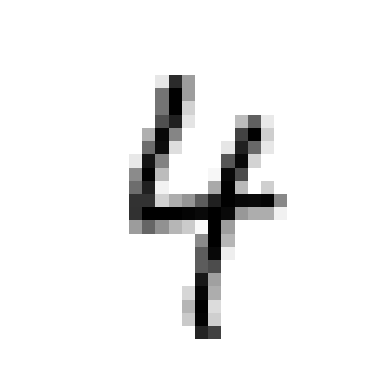

In [44]:
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [31]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [32]:
print(y_train)


0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [15]:
import numpy as np
y_train=y_train.astype(np.int8)
print(y_train)


0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int8


In [16]:
y_train_4=(y_train==4)
print(y_train_4)


0        False
1        False
2         True
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


In [17]:
y_test_4=(y_test==4)
print(y_test_4)

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool


In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)


In [19]:
sgd_clf.fit(x_train,y_train_4)


SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

C:\Users\GPREC\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [21]:
# The classifier guesses that this image represents a   4 (True).
#Performance Measures
#There are many performance measures available, 
#Measuring Accuracy Using   
#Cross-Validation
 #Confusion Matrix
 #Precision and Recall
 #The ROC Curve
#Measuring Accuracy Using Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_4, cv=3, scoring="accuracy")



array([0.9671 , 0.97645, 0.9687 ])

In [22]:
#Measuring Accuracy Using Confusion Matrix
#A much better way to evaluate the performance of a classifier is to look at the confusion matrix.
#To compute the confusion matrix, 
#you first need to have a set of predictions, 
#so they can be compared to the actual targets. 
#You could make predictions on the test set.


In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3)


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52957,  1201],
       [  554,  5288]], dtype=int64)

In [25]:
#Measuring Accuracy Using Precision and Recall 
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_4, y_train_pred)

0.8149175527816305

In [26]:
recall_score(y_train_4, y_train_pred) 

0.905169462512838

In [27]:
# Measuring Accuracy Using F1 score.
from sklearn.metrics import f1_score
f1_score(y_train_4, y_train_pred)


0.8576757764982564